## Spectrogram maker

I've now collected the relevant pitch audio clips and need to convert them into spectrograms so a CNN can perform visual recogniton practiced on a whip-poor-will birdcall and fine tuned parameters and became familiar with the libraries I would be using. Use the reference Efremova et al 2019 IEEE for processing parameters.

In [2]:
from pydub import AudioSegment
from scipy import signal
from scipy.io import wavfile
import moviepy.editor as mpy
from pydub.playback import play

from PIL import Image

import os
import cv2
import scipy.misc
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors

from IPython.display import clear_output

%matplotlib inline

In [139]:
%%time

#GAMES SUMMARY
summary=pd.read_csv('E://HOU18/World series 2017/2017WS_games.csv')

# GAME NUMBER
n=1

#GAME LOG
game=pd.read_csv(f'E://HOU18/World series 2017/games/game {n}/pitch outcomes and time.csv')

opp=summary['Opponent'][0]

#LOOP ITERATOR
x=0


#RESOLUTION OF IMAGES
my_dpi=150

path=(f'E://HOU18/World series 2017/games/game {n}/')

#SET UP FOLDERS
if not os.path.exists(f'{path}audio clips/{opp} pitchers/mono clips/'):
    os.mkdir(f'{path}audio clips/{opp} pitchers/mono clips/')  

if not os.path.exists(f'{path}audio clips/HOU pitchers/mono clips/'):
    os.mkdir(f'{path}audio clips/HOU pitchers/mono clips/')  

if not os.path.exists(f'{path}spectrograms/'):
    os.mkdir(f'{path}spectrogams/')  

if not os.path.exists(f'{path}spectrograms/{opp} pitchers/'):
    os.mkdir(f'{path}spectrogams/{opp} pitchers/')

if not os.path.exists(f'{path}spectrograms/HOU pitchers/'):
    os.mkdir(f'{path}spectrogams/HOU pitchers/')
     
        
while x < len(game):
    
    file_name=(f"{game['game_pitch'].values[x]} {game['pitcher'].values[x]} pitch #{game['pitch_count'].values[x]} - {game['pitch_type'].values[x]}")
    
    if game['astro_batter'].values[x] == 1:
        
        #CONVERT STEREO TO MONO
        sound=AudioSegment.from_wav(f'{path}audio clips/{opp} pitchers/{file_name}.wav')
        sound=sound.set_channels(1)
        sound=sound.set_frame_rate(22050)
        
        #EXPORT MONO FOR FUTURE REFERENCE
        sound.export(f'{path}audio clips/{opp} pitchers/mono clips/{file_name}',format='wav')
        
        #PULL IN AND UNPACK MONO WAV FILE
        sample_rate, samples = wavfile.read(f'{path}audio clips/{opp} pitchers/mono clips/{file_name}.wav')
        
        #CALCULATE AND UNPACK SPECTROGRAM 
        freq,times,spectro=signal.spectrogram(samples, sample_rate,window='hamming',nperseg=1024,noverlap=896,scaling='density')
        
        #CONVERT TO dB and scale from 0 to 255
        dB=np.log(1+(spectro))
        scale=255/dB.max()
        dB=dB*scale
        
        # CREATE SPECTROGRAM AND EXPORT
        fig=plt.figure(figsize=(1080/my_dpi,720/my_dpi),frameon=False,dpi=my_dpi)
        ax=plt.Axes(fig, [0.,0.,1.,1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        ax.pcolormesh(times,freq,dB,vmin=0,cmap='bone')
        fig.savefig(f'{path}spectrogams/{opp} pitchers/{file_name}.tiff')
        plt.close()
        
    elif game['astro_batter'].values[x] == 0:
        
        #CONVERT STEREO TO MONO
        sound=AudioSegment.from_wav(f'{path}audio clips/HOU pitchers/{file_name}.wav')
        sound=sound.set_channels(1)
        sound=sound.set_frame_rate(22050)
        
        #EXPORT MONO FOR FUTURE REFERENCE
        sound.export(f'{path}audio clips/HOU pitchers/mono clips/{file_name}',format='wav')
        
        #PULL IN AND UNPACK MONO WAV FILE
        sample_rate, samples = wavfile.read(f'{path}audio clips/HOU pitchers/mono clips/{file_name}.wav')
    
        #CALCULATE AND UNPACK SPECTROGRAM 
        freq,times,spectro=signal.spectrogram(samples, sample_rate,window='hamming',nperseg=1024,noverlap=896,scaling='density')
        
        #CONVERT TO dB and scale from 0 to 255
        dB=np.log(1+(spectro))
        scale=255/dB.max()
        dB=dB*scale

        # CREATE SPECTROGRAM AND EXPORT
        fig=plt.figure(figsize=(1080/my_dpi,720/my_dpi),frameon=False,dpi=my_dpi)
        ax=plt.Axes(fig, [0.,0.,1.,1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        ax.pcolormesh(times,freq,dB,vmin=0,cmap='bone')
        fig.savefig(f'{path}spectrogams/HOU pitchers/{file_name}.tiff')
        plt.close()
        
    clear_output(wait=True)
    x+=1


Wall time: 4min 32s


## SINGLE SPECTROGRAM

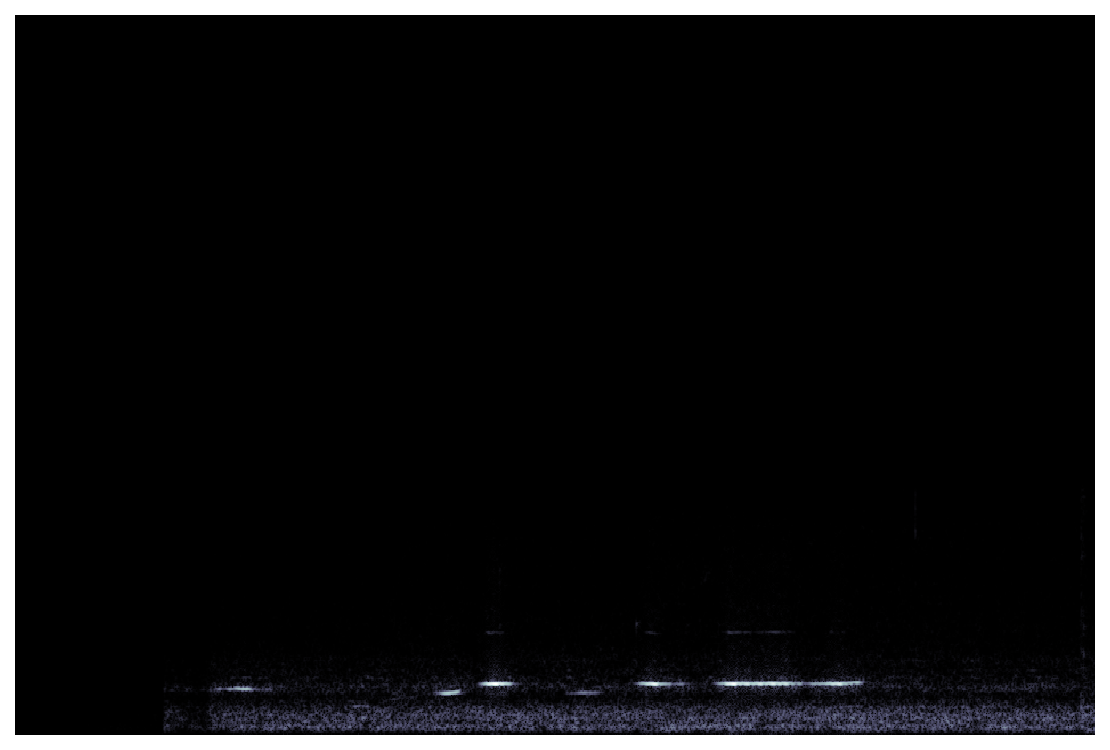

In [10]:
name='Mono Up Cut 4'

sample_rate, samples = wavfile.read("C://Users/16142/Desktop/whistle.wav")
freq,times,spectro=signal.spectrogram(samples, sample_rate,window='hamming',nperseg=1024,noverlap=896,scaling='density')

#Process spectrogram so intensity is a value between 0 and 255
dB=np.log(1+(spectro))
scale=255/dB.max()
dB=dB*scale

my_dpi=150
fig=plt.figure(figsize=(1080/my_dpi,720/my_dpi),frameon=False,dpi=my_dpi)
ax=plt.Axes(fig, [0.,0.,1.,1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.pcolormesh(times,freq,dB,vmin=0,cmap='bone')
#fig.savefig(f'E://HOU18/b27 whistle/spectrograms/{name}.tiff')